In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
%config Completer.use_jedi = False


In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import date
from datetime import time
from datetime import timedelta
from datetime import datetime


In [4]:
dateTimeObj = datetime.now()
today = date.today()


#timestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S.%f)")
this_day = dateTimeObj.strftime("%Y-%m-%d")
print('Current day : ', this_day)
one_year_ago_obj = dt.datetime.today() - dt.timedelta(days=365)
one_year_ago = one_year_ago_obj.strftime("%Y-%m-%d")
print(one_year_ago)

Current day :  2019-10-27
2018-10-27


# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# basic stuff
from sqlalchemy.sql import text
import pandas as pd
conn = engine.connect()
all_measurement_sql = "SELECT * FROM measurement"
all_measurement_df = pd.read_sql(all_measurement_sql, conn)
all_measurement_df.head()


id      station        date  prcp  tobs
0   1  USC00519397  2010-01-01  0.08  65.0
1   2  USC00519397  2010-01-02  0.00  63.0
2   3  USC00519397  2010-01-03  0.00  74.0
3   4  USC00519397  2010-01-04  0.00  76.0
4   5  USC00519397  2010-01-06   NaN  73.0

In [12]:
station_list_sql = "SELECT station FROM station"
station_list_df = pd.read_sql(station_list_sql, conn)
station_list_df.head()
station_list_df

station
0  USC00519397
1  USC00513117
2  USC00514830
3  USC00517948
4  USC00518838
5  USC00519523
6  USC00519281
7  USC00511918
8  USC00516128

In [13]:
all_station_sql = "SELECT * FROM station"
all_station_df = pd.read_sql(all_station_sql, conn)
all_station_df.head()

id      station                                    name  latitude  \
0   1  USC00519397                    WAIKIKI 717.2, HI US   21.2716   
1   2  USC00513117                    KANEOHE 838.1, HI US   21.4234   
2   3  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US   21.5213   
3   4  USC00517948                       PEARL CITY, HI US   21.3934   
4   5  USC00518838              UPPER WAHIAWA 874.3, HI US   21.4992   

   longitude  elevation  
0  -157.8168        3.0  
1  -157.8015       14.6  
2  -157.8374        7.0  
3  -157.9751       11.9  
4  -158.0111      306.6

In [14]:
# get latest date in db
max_date_df = pd.read_sql("SELECT max(date) FROM measurement;", conn)
max_date = max_date_df.iloc[0,0]
max_date_df.head()


max(date)
0  2017-08-23

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_year_prcp_sql = "SELECT prcp from measurement where date > date('"+max_date+"', '-365 days')"
#print(last_year_prcp_sql)
last_year_prcp_df = pd.read_sql(last_year_prcp_sql , conn)
last_year_prcp_df.head()
#last_year_prcp_df.plot()


prcp
0  0.08
1  0.08
2  0.00
3  0.00
4  0.01

In [16]:
# Calculate the date 1 year ago from the last data point in the database
last_year_sql = "SELECT date from measurement where date == date('"+max_date+"', '-365 days') LIMIT 1"
#print(last_year_sql)
last_year_df = pd.read_sql(last_year_sql , conn)
last_year_df.head()
last_year_date = last_year_df.iloc[0,0]
print(last_year_date)

2016-08-23


In [17]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


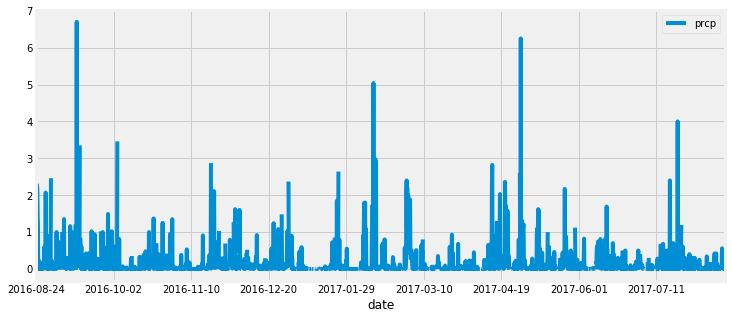

In [18]:
last_year_prcp_date_sql = "SELECT date, prcp from measurement where date > date('"+max_date+"', '-365 days')"
#print(last_year_prcp_date_sql)
last_year_prcp_date_df = pd.read_sql(last_year_prcp_date_sql, conn)
last_year_prcp_date_df.head()
#last_year_prcp_df.plot()
last_year_prcp_date_idx_df = last_year_prcp_date_df.set_index('date')
last_year_prcp_date_idx_df.sort_index(axis=0, inplace=True)
last_year_prcp_date_idx_df.plot(figsize=(11,5))

In [19]:
last_year_prcp_date_df.tail()

date  prcp
2218  2017-08-19  0.09
2219  2017-08-20   NaN
2220  2017-08-21  0.56
2221  2017-08-22  0.50
2222  2017-08-23  0.45

In [20]:
last_year_prcp_date_df.describe()

prcp
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

![precipitation](Images/precipitation.png)

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# Design a query to retrieve the last 12 months of precipitation data and plot the results


![describe](Images/describe.png)

In [22]:
# Design a query to show how many stations are available in this dataset?
distinct_stations_sql = """SELECT count(distinct(station)) FROM measurement as Station_Count """
print(distinct_stations_sql)
distinct_stations_df = pd.read_sql(distinct_stations_sql, conn)
distinct_stations_df.head()

SELECT count(distinct(station)) FROM measurement as Station_Count 


count(distinct(station))
0                         9

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations_sql = "SELECT station, count(prcp) FROM measurement GROUP BY station ORDER BY count(prcp) DESC"
most_active_stations_df = pd.read_sql(most_active_stations_sql, conn)
most_active_stations_df.head()
most_active_station = most_active_stations_df.iloc[0,0]
print(most_active_station)



USC00519281


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
station_temps_sql = "select min(tobs), max(tobs), avg(tobs) from measurement where station='" + most_active_station + "'"
print(station_temps_sql)
station_temps_df = pd.read_sql(station_temps_sql, conn)
station_temps_df.head()

select min(tobs), max(tobs), avg(tobs) from measurement where station='USC00519281'


min(tobs)  max(tobs)  avg(tobs)
0       54.0       85.0  71.663781

In [25]:
# Choose the station with the highest number of temperature observations.


In [26]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_year_temps_sql = "SELECT tobs from measurement where date > date('"+max_date+"', '-365 days') AND station == '" + most_active_station + "'    "
#print(last_year_prcp_sql)
last_year_temps_df = pd.read_sql(last_year_temps_sql , conn)
last_year_temps_df.head()

tobs
0  77.0
1  80.0
2  80.0
3  75.0
4  73.0

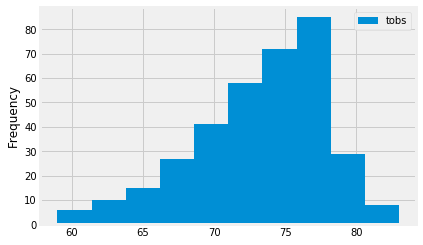

In [27]:
last_year_temps_df.plot(kind='hist')

![precipitation](Images/station-histogram.png)

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
def my_sql_calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    sql_calc_temps_sql = "SELECT min(tobs), avg(tobs), max(tobs) from measurement where date BETWEEN '"+start_date+"'and '"+end_date+"' "
    sql_calc_temps_sql_df = pd.read_sql(sql_calc_temps_sql , conn)
    return sql_calc_temps_sql_df
my_trip_temps = my_sql_calc_temps('2013-12-01', '2015-01-01')


In [30]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
my_trip_temps.head()


min(tobs)  avg(tobs)  max(tobs)
0       56.0  73.068358       85.0

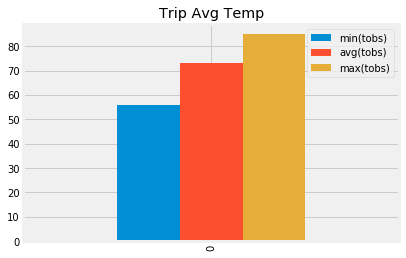

In [31]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
my_trip_temps.plot(kind='bar',title='Trip Avg Temp')

In [32]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def my_vacation_precip(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    sql_calc_temps_sql = "SELECT sum(prcp), station from measurement \
        where date BETWEEN '"+start_date+"'and '"+end_date+"' \
        group by station \
        order by sum(prcp) DESC "
    print(sql_calc_temps_sql)
    sql_calc_temps_sql_df = pd.read_sql(sql_calc_temps_sql , conn)
    return sql_calc_temps_sql_df

vaca_precip = my_vacation_precip('2013-12-01', '2015-01-01')
vaca_precip.head()

SELECT sum(prcp), station from measurement         where date BETWEEN '2013-12-01'and '2015-01-01'         group by station         order by sum(prcp) DESC 


sum(prcp)      station
0     155.03  USC00516128
1      97.04  USC00519281
2      63.28  USC00513117
3      50.30  USC00519523
4      40.70  USC00514830

## Optional Challenge Assignment

In [33]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [34]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [35]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [36]:
# Plot the daily normals as an area plot with `stacked=False`
